### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
month, alive = np.loadtxt('data/retention-example.csv', dtype='object', delimiter=',', unpack=True, skiprows=1) 
month = month.astype(int)
alive = alive.astype(float)

### Non-linear Least Square - 1 Customer Segment

This model is based on the pattern of monthly losses and the number of survivors at the end of the period. For the data provided, we are looking at whether the customers are going to churn in any of the given months or survive until the end of the period. 

In [3]:
# Observed retention curve
retention = alive/alive[0]
# Monthly loss
loss = alive[:-1] - alive[1:]

In [4]:
from scipy.optimize import minimize

def square_error(x):
    e_retention = np.ones_like(retention) * (x**month) # Expected monthly retention rate
    e_churn = e_retention[:-1] - e_retention[1:] # Expected monthly churn rate
    en_loss = e_churn * alive[0] # Expected number of losses / month
    loss_error = np.sum((en_loss - loss)**2) # Sum of square of error - expected and actual loss
    survivor_error = ((e_retention[-1] * alive[0]) - alive[-1])**2 # Sum of square of error - expected and actual survivors at the end of the period
    return loss_error + survivor_error

x_guess = 0.94
res = minimize(square_error, x_guess)
print('Predicted Monthly Retention Rate =', f'{res.x[0]:0.2%}')
print('Sum of Squared Errors =', f'{res.fun:0.0f}')

Predicted Monthly Retention Rate = 94.84%
Sum of Squared Errors = 272850400


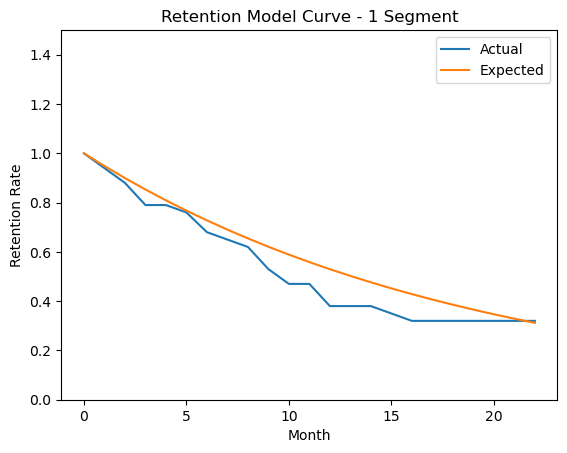

In [ ]:
plt.plot(month, retention, label="Actual")
plt.plot(month, np.ones_like(retention) * (res.x**month), label="Expected")
plt.title('Retention Model Curve - 1 Customer Segment')
plt.xlabel("Month")
plt.ylabel("Retention Rate")
plt.ylim((0,1.5))
plt.legend()

### Non-linear Least Square - 2 Customer Segment

In [6]:
# Observed retention curve
retention = alive/alive[0]
# Monthly loss
loss = alive[:-1] - alive[1:]

# Customer segment 1: Retention rate
rr_s1 = 1

In [7]:
from scipy.optimize import minimize

def square_error(x):
    e_retention = (np.ones_like(retention) * (rr_s1**month) * x[1]) + \
                  (np.ones_like(retention) * (x[0]**month) * (1 - x[1]))
    e_churn = e_retention[:-1] - e_retention[1:] 
    en_loss = e_churn * alive[0] 
    loss_error = np.sum((en_loss - loss)**2) 
    survivor_error = ((e_retention[-1] * alive[0]) - alive[-1])**2
    return loss_error + survivor_error

rr_guess, y_guess = 0.94, 0.19
bnds = ((0, 1), (0, 1))
res = minimize(square_error, x0=(rr_guess, y_guess), bounds=bnds)
print('Monthly Retention Rate - Segment 1 =', f'{rr_s1:0.2%}')
print('% of Customer - Segment 1 =', f'{res.x[1]:0.2%}')
print('Monthly Retention Rate - Segment 2 =', f'{res.x[0]:0.2%}')
print('% of Customer - Segment 2 =', f'{1 - res.x[1]:0.2%}')
print('Sum of Squared Errors =', f'{res.fun:0.0f}')

Monthly Retention Rate - Segment 1 = 100.00%
% of Customer - Segment 1 = 21.00%
Monthly Retention Rate - Segment 2 = 91.39%
% of Customer - Segment 2 = 79.00%
Sum of Squared Errors = 252951531


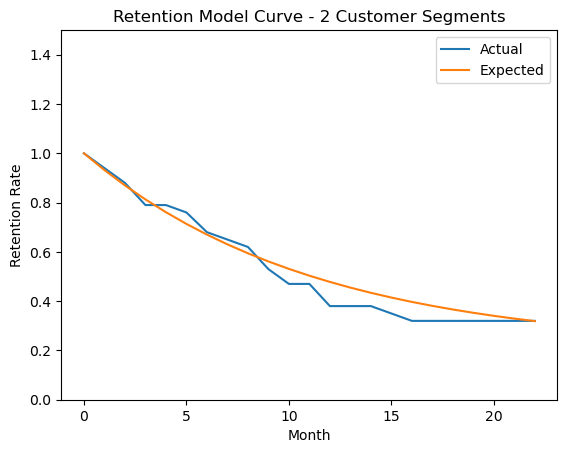

In [ ]:
e_retention = (np.ones_like(retention) * (rr_s1**month) * res.x[1]) + \
                (np.ones_like(retention) * (res.x[0]**month) * (1 - res.x[1]))
                
plt.plot(month, retention, label="Actual")
plt.plot(month, e_retention, label="Expected")
plt.title('Retention Model Curve - 2 Customer Segments')
plt.xlabel("Month")
plt.ylabel("Retention Rate")
plt.ylim((0,1.5))
plt.legend()